## Data Science aplicado a lista de espera do SUS na cidade do Rio de janeiro

### Conhecendo o problema


O objetivo deste projeto é verificar o comportamento da lista de espera para realização de procedimentos no SUS da cidade do Rio de janeiro.

### Conhecendo os dados

Os dados utilizados foram fornecidos através dos dados abertos da Secretaria Municipal de Saúde Transparência do SISREG Ambulatorial : <a href='https://smsrio.org/transparencia/#/'> Fila de Espera </a>.

## Coluna - Tipo - Descrição
* ANO_NASCIMENTO - inteiro - Ano de nascimento do cidadão
* PESO - inteiro - Peso em quilos do cidadão
* ALTURA - inteiro - Altura em centímetros do cidadão
* CABECA - inteiro - Tamanho da cabeça em centímetros do cidadão
* CALCADO - inteiro - Número do calçado do cidadão
* CINTURA - texto - Tamanho da cintura em centímetros do cidadão
* RELIGIAO - texto - Religião do cidadão
* MUN_NASCIMENTO - texto - Município de nascimento do cidadão
* UF_NASCIMENTO - texto - UF de nascimento do cidadão (KK - UF no exterior)
* PAIS_NASCIMENTO - texto - País de nascimento do cidadão
* ESTADO_CIVIL - texto - Estado civil (Solteiro, Casado, Desquitado, Divorciado, Viúvo, Separado Judicialmente, Outros) do cidadão
* SEXO - texto - Sexo ( M - Masculino, F - Feminino) do cidadão
* ESCOLARIDADE - texto - Escolaridade do cidadão
* VINCULACAO_ANO - inteiro - Ano de alistamento do cidadão
* DISPENSA - texto - Se o cidadão foi dispensado ou não (Sem dispensa, Com dispensa)
* ZONA_RESIDENCIAL - texto - Tipo de zona residencial (Rural, Urbana) do cidadão
* MUN_RESIDENCIA - texto - Município de residência do cidadão
* UF_RESIDENCIA - texto - UF de residência do cidadão (KK - UF no exterior)
* PAIS_RESIDENCIA - texto - País de residência do cidadão
* JSM - texto - Junta de Serviço Militar em que o cidadão realizou o alistamento
* MUN_JSM - texto - Município da Junta de Serviço Militar
* UF_JSM - texto - UF da Junta de Serviço Militar (KK - UF no exterior)

E o dicionário_series que faz a padronização quanto as séries dos inscritos possui os seguintes dados:
* Valores_errados - texto - Valores escritos de maneira errada
* Valores_certos - texto - Valores escritos de maneira correta de acordo com a lei X

In [780]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [781]:
%%time
#Importando o dataframe
df = pd.read_csv("Analise fila SUS RJ\Analise fila SUS RJ - Dezembro - 10-12-20.csv",sep=";",encoding='ANSI')
proc=pd.read_csv("Analise fila SUS RJ\dicionário_procedimentos.csv",sep=";",encoding='ANSI')

Wall time: 1.64 s


In [782]:
#Inspecionando os dados
print("Informações do dataset:")
print(df.info())

print("Nomes das colunas:")
print(df.columns.values)

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386953 entries, 0 to 386952
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   POSICAO                         386953 non-null  int64  
 1   CLASSIFICAÇÃO DE RISCO          386953 non-null  object 
 2   CNS DO PACIENTE                 386953 non-null  object 
 3   CODIGO DA SOLICITAÇÃO           386953 non-null  int64  
 4   DATA DA SOLICITAÇÃO             386953 non-null  object 
 5   NOME DO PACIENTE                386953 non-null  object 
 6   DATA DE NASCIMENTO DO PACIENTE  386953 non-null  object 
 7   CNES SOLICITANTE                386953 non-null  int64  
 8   UNIDADE SOLICITANTE             386953 non-null  object 
 9   CÓDIGO DO PROCEDIMENTO          386953 non-null  int64  
 10  PROCEDIMENTO                    0 non-null       float64
 11  TEMPO MÉDIO DE ATENDIMENTO      0 non-null       float

In [783]:
#Identificando dados nulos do dataframe
print("Dados nulos:")
print(df.isnull().sum())

Dados nulos:
POSICAO                                0
CLASSIFICAÇÃO DE RISCO                 0
CNS DO PACIENTE                        0
CODIGO DA SOLICITAÇÃO                  0
DATA DA SOLICITAÇÃO                    0
NOME DO PACIENTE                       0
DATA DE NASCIMENTO DO PACIENTE         0
CNES SOLICITANTE                       0
UNIDADE SOLICITANTE                    0
CÓDIGO DO PROCEDIMENTO                 0
PROCEDIMENTO                      386953
TEMPO MÉDIO DE ATENDIMENTO        386953
dtype: int64


In [784]:
df

,POSICAO,CLASSIFICAÇÃO DE RISCO,CNS DO PACIENTE,CODIGO DA SOLICITAÇÃO,DATA DA SOLICITAÇÃO,NOME DO PACIENTE,DATA DE NASCIMENTO DO PACIENTE,CNES SOLICITANTE,UNIDADE SOLICITANTE,CÓDIGO DO PROCEDIMENTO,PROCEDIMENTO,TEMPO MÉDIO DE ATENDIMENTO
0,5152,AZUL,"8,98005E+14",290527037,29/05/2019,R P,13/06/2000,2269937,SMS CMS ALBERTO BORGERTH AP 33,1407006,NaN,NaN
1,651,AMARELO,"7,00003E+14",289869831,24/05/2019,P C F,19/01/1984,2296535,SMS CMS NAGIB JORGE FARAH AP 31,710565,NaN,NaN
2,488,AZUL,"7,05308E+14",294238222,25/06/2019,A M V F,02/03/1972,2269651,SMS CMS DOM HELDER CAMARA AP 21,1314095,NaN,NaN
3,36,AMARELO,"7,08903E+14",294100858,24/06/2019,M J F S,26/03/1958,2269546,SMS CMS DR OSWALDO VILELLA AP 52,1313031,NaN,NaN
4,2123,AZUL,"8,98002E+14",291662346,05/06/2019,R N N,30/05/2001,2280205,SMS CMS RODOLPHO PERISSE VIDIGAL AP 21,703079,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
386948,3132,AMARELO,"7,04804E+14",345255248,08/10/2020,S M N P,04/06/1948,7021771,SMS CF RAIMUNDO ALVES NASCIMENTO AP 33,2300021,NaN,NaN
386949,101,AMARELO,"7,00009E+14",345254378,08/10/2020,L C S F,19/02/1969,6225152,SECRETARIA MUNICIPAL DE SAUDE DE QUEIMADOS,2018248,NaN,NaN
386950,1334,AMARELO,"7,04804E+14",345255953,08/10/2020,S M N P,04/06/1948,7021771,SMS CF RAIMUNDO ALVES NASCIMENTO AP 33,701022,NaN,NaN
386951,1288,VERDE,"7,04508E+14",345257429,08/10/2020,F R,09/07/1984,5179726,SMS CF ALOYSIO AUGUSTO NOVIS AP 31,701714,NaN,NaN


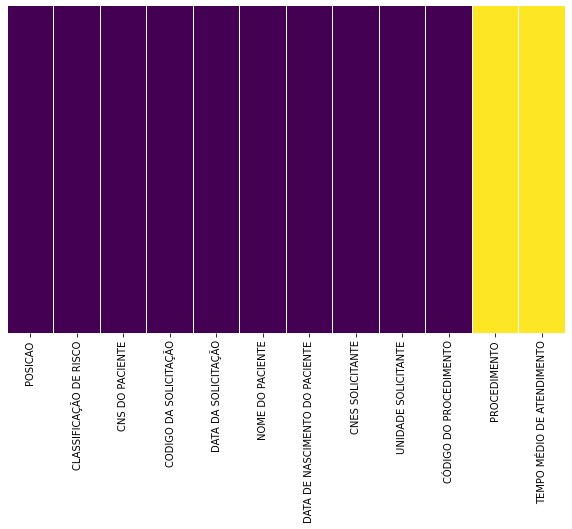

In [785]:
#Identificando visualmente os erros presentes nas colunas
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [786]:
#Dropa as colunas que não serão utilizadas
df.drop(['PROCEDIMENTO','CNES SOLICITANTE','CNS DO PACIENTE','NOME DO PACIENTE','TEMPO MÉDIO DE ATENDIMENTO'], inplace=True, axis=1)

#Unindo as colunas e preenchendo a coluna procedimento
df_atualizado=pd.merge(df,proc,on='CÓDIGO DO PROCEDIMENTO', how='left')

### Analisando a idade

In [787]:
#Cria coluna idade
df_atualizado['IDADE']=0

#Função que retorna a idade em anos
def calcula_idade(data_nascimento):
    #Recebe a data em formato date
    hoje = datetime.date.today()
    idade = hoje.year - data_nascimento.year -((hoje.month, hoje.day)<(data_nascimento.month, data_nascimento.day))
    return idade

#Calcula a idade de cada paciente
df_atualizado['IDADE'] = df_atualizado.apply(lambda row: calcula_idade(datetime.datetime.strptime(row['DATA DE NASCIMENTO DO PACIENTE'],"%d/%m/%Y")), axis=1)

### Analisando dias na fila

In [788]:
#Cria coluna dias_na_fila
df_atualizado['DIAS_NA_FILA']=0

#Transforma a coluna data solicitação em datetime
df_atualizado['DATA DA SOLICITAÇÃO']=pd.to_datetime(df_atualizado['DATA DA SOLICITAÇÃO'])
d1=df_atualizado['DATA DA SOLICITAÇÃO']

#data em que foi realizada a análise
d2=pd.to_datetime('2020-12-10')

#Calcula os dias na fila do exame
dias=abs(d2-d1)

#Preenche a coluna dias na fila
df_atualizado['DIAS_NA_FILA']=dias.dt.days

#Descrevendo os dados
df_atualizado['DIAS_NA_FILA'].describe()

count    386953.000000
mean        442.005360
std         273.265068
min           1.000000
25%         252.000000
50%         418.000000
75%         584.000000
max        3697.000000
Name: DIAS_NA_FILA, dtype: float64

In [789]:
#Estes filtros facilitam a análise por grupos de idade. Por padrão ficam desabilitados

#Apenas crianças até 10 anos
#df_atualizado=df_atualizado[df_atualizado['IDADE']<=10]

#Apenas adultos com mais de 40 anos
#df_atualizado=df_atualizado[df_atualizado['IDADE']>=40]

In [790]:
Analise_idades=df_atualizado.filter(items=['DATA DE NASCIMENTO DO PACIENTE','IDADE']).sort_values(by='IDADE',ascending=False)

print("Idades dos 5 pacientes mais idosos")
print(Analise_idades.head(5))

print("Idades dos 5 pacientes mais jovens")
print(Analise_idades.tail(5))

Idades dos 5 pacientes mais idosos
       DATA DE NASCIMENTO DO PACIENTE  IDADE
365408                     10/01/1912    108
74068                      06/04/1914    106
225317                     06/04/1914    106
191700                     11/01/1916    104
352428                     07/06/1916    104
Idades dos 5 pacientes mais jovens
       DATA DE NASCIMENTO DO PACIENTE  IDADE
129684                     28/03/2020      0
129679                     23/03/2020      0
129669                     10/04/2020      0
129656                     12/12/2019      0
148327                     12/12/2019      0


### Histograma das idades

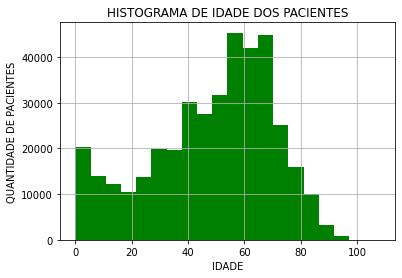

In [791]:
#Histograma das idades
plt.hist(Analise_idades['IDADE'],rwidth=1,bins=20,color='green',label=['Idade'])
plt.ylabel("QUANTIDADE DE PACIENTES")
plt.xlabel("IDADE")
plt.title("HISTOGRAMA DE IDADE DOS PACIENTES")
plt.grid('true')

In [792]:
Filas_hospital=df_atualizado.filter(items=['UNIDADE SOLICITANTE','CODIGO DA SOLICITACAO']).sort_values(by='UNIDADE SOLICITANTE',ascending=False)
Filas_hospital['UNIDADE SOLICITANTE'].value_counts().sort_values(ascending=False)

SMS CMS JORGE SALDANHA BANDEIRA DE MELLO AP40         7686
SMS CMS ALBERTO BORGERTH AP 33                        7034
SMS CMS CARMELA DUTRA AP 33                           6773
SMS CMS CARLOS GENTILLE DE MELLO AP 32                6719
SMS CMS CLEMENTINO FRAGA AP 33                        5310
                                                      ... 
SMS CMS MORRO UNIAO AP 33                                1
UNIDADE DE VIGILANCIA SANITARIA DE SAO JOSE DE UBA       1
CLINICA DE OLHOS                                         1
HOSPITAL MUNICIPAL NOSSA SENHORA DAS DORES               1
UFRJ MATERNIDADE ESCOLA DA UFRJ                          1
Name: UNIDADE SOLICITANTE, Length: 488, dtype: int64

### ANÁLISE GRÁFICA

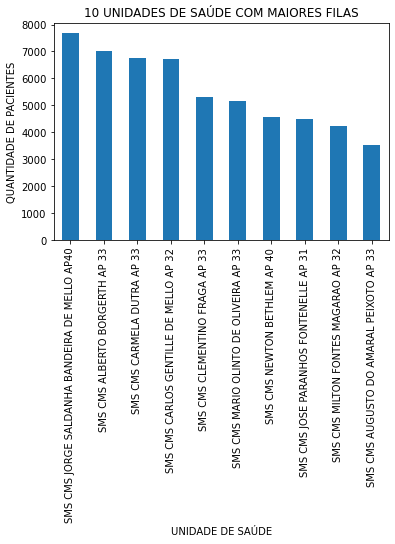

In [793]:
# Configura a legenda do eixo X
plt.xlabel('UNIDADE DE SAÚDE')

# Configura a legenda do eixo Y
plt.ylabel('QUANTIDADE DE PACIENTES')

# Título do gráfico
plt.title("10 UNIDADES DE SAÚDE COM MAIORES FILAS")

Filas_hospital['UNIDADE SOLICITANTE'].value_counts().sort_values(ascending=False).head(10).plot.bar()

### Histograma do tempo na fila por quantidade de paciente

count    386953.000000
mean        442.005360
std         273.265068
min           1.000000
25%         252.000000
50%         418.000000
75%         584.000000
max        3697.000000
Name: DIAS_NA_FILA, dtype: float64

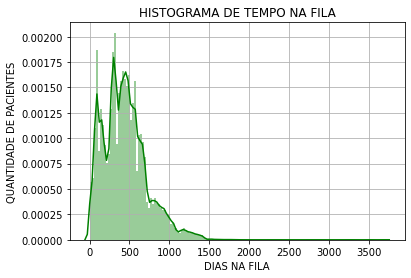

In [794]:
#Histograma dos dias na fila
Analise_procedimentos=df_atualizado.filter(items=['CODIGO DO PROCEDIMENTO','DIAS_NA_FILA','CLASSIFICAÇÃO DE RISCO','IDADE','PROCEDIMENTO','UNIDADE SOLICITANTE']).sort_values(by='DIAS_NA_FILA',ascending=False)
sns.distplot(Analise_procedimentos['DIAS_NA_FILA'], bins='rice', color='green', hist=True)
plt.xlabel("DIAS NA FILA")
plt.ylabel("QUANTIDADE DE PACIENTES")
plt.title("HISTOGRAMA DE TEMPO NA FILA")
plt.grid('true')
#Descrevendo os dados
Analise_procedimentos['DIAS_NA_FILA'].describe()

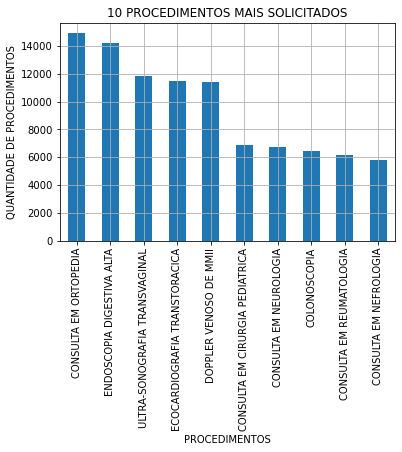

In [795]:
#10 procedimentos mais solicitados

Analise_procedimentos=df_atualizado.filter(items=['CODIGO DO PROCEDIMENTO','DIAS_NA_FILA','CLASSIFICAÇÃO DE RISCO','IDADE','PROCEDIMENTO']).sort_values(by='PROCEDIMENTO',ascending=False)
Analise_procedimentos['PROCEDIMENTO'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("QUANTIDADE DE PROCEDIMENTOS")
plt.xlabel("PROCEDIMENTOS")
plt.title("10 PROCEDIMENTOS MAIS SOLICITADOS")
plt.grid('true')

### Analisando a classificação de risco

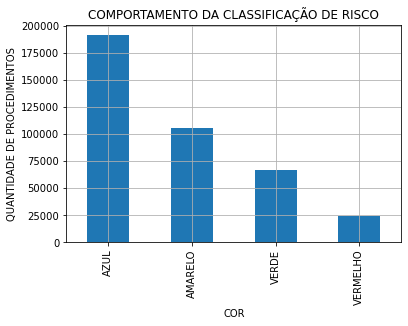

In [796]:
# Distribuição da classificação de risco

Analise_procedimentos=df_atualizado.filter(items=['CODIGO DO PROCEDIMENTO','DIAS_NA_FILA','CLASSIFICAÇÃO DE RISCO','IDADE','PROCEDIMENTO']).sort_values(by='PROCEDIMENTO',ascending=False)
Analise_procedimentos['CLASSIFICAÇÃO DE RISCO'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("QUANTIDADE DE PROCEDIMENTOS")
plt.xlabel("COR")
plt.title("COMPORTAMENTO DA CLASSIFICAÇÃO DE RISCO")
plt.grid('true')

### Gráfico de dias na fila x classificação de risco x idade

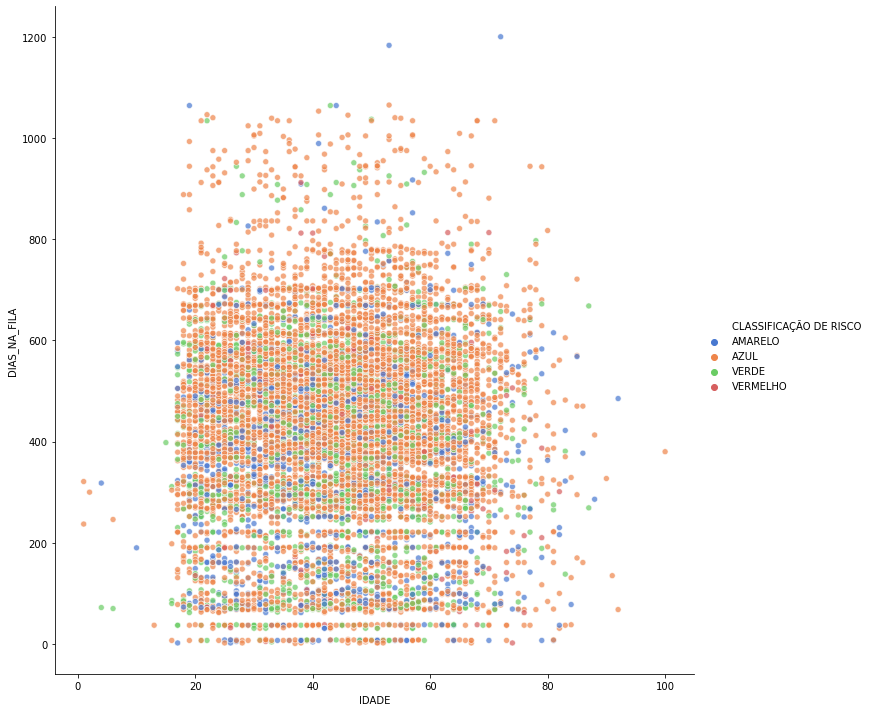

In [797]:
sns.relplot(x="IDADE", y="DIAS_NA_FILA", hue="CLASSIFICAÇÃO DE RISCO",sizes=(50,500), alpha=.7, palette="muted", height=10, data=Analise_procedimentos.head(10000))

### Gráfico de dias na fila x Procedimento x Idade

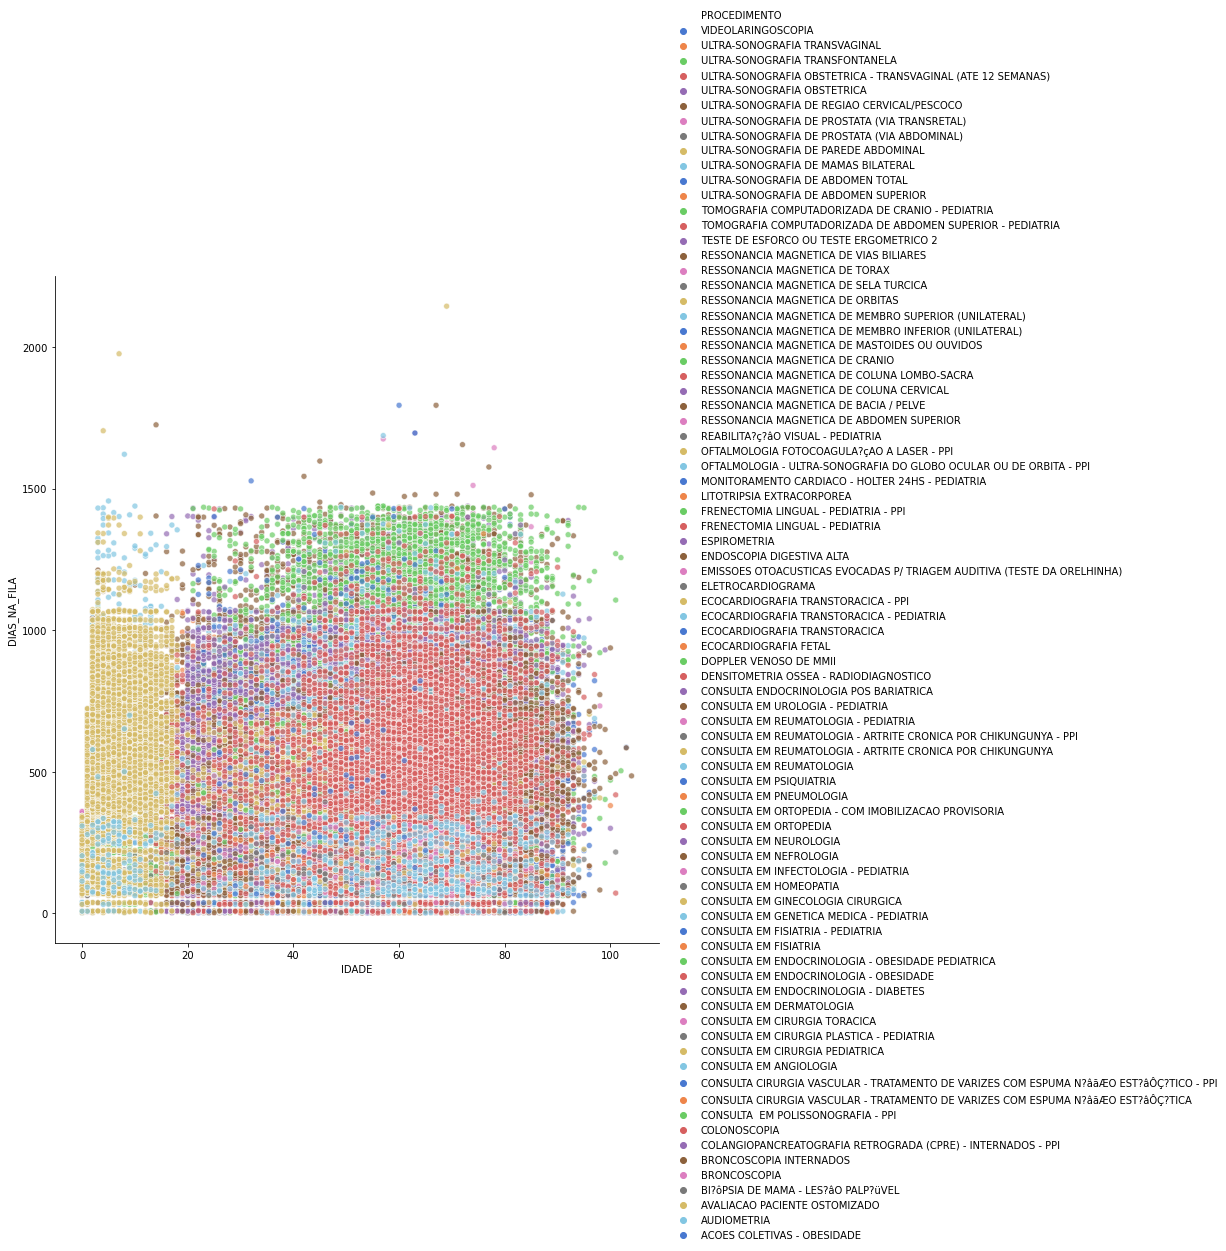

In [798]:
sns.relplot(x="IDADE", y="DIAS_NA_FILA", hue="PROCEDIMENTO",sizes=(50,500), alpha=.7, palette="muted", height=10, data=Analise_procedimentos)